# Creating the stimuli for visuospatial order working memory task

In [84]:
from psychopy import visual, core, event, gui # data, logging
from psychopy.visual import ShapeStim

# import experiment_code.constants as consts
# from experiment_code.screen import Screen
# from experiment_code.ttl import ttl

from ast import literal_eval

In [85]:
from psychopy import visual, core, logging, event, data, monitors

class Screen: 

    def __init__(self):
        self.fullscr  = False
        self.units    = 'deg'
        self.color    = '#808080'
        self.size     = [1440, 900] #[800, 800] #[1440, 900]
        self.distance = 57.0
        self.width    = 30.0
        self.allowGUI = True,
        self.window   = self._create_window()
        self.monitor  = self._create_monitor()

    def _create_window(self): 
        return visual.Window(size = self.size, 
                            monitor = self._create_monitor(),
                            fullscr = self.fullscr,
                            units = self.units,
                            color = self.color, 
                            allowGUI = self.allowGUI) 

    def _create_monitor(self):
        # set up monitor
        monitor = monitors.Monitor(
       "maedbh_laptop",
        distance = self.distance,
        width = self.width,
        )
        monitor.setSizePix(self.size) # screen size (not window!) look in display prefs 
        monitor.saveMon()
        return monitor

    def fixation_cross(self):
        #fixation cross
        fixation = visual.ShapeStim(self.window, 
            vertices=((0, -0.05), (0, 0.05), (0,0), (-0.03,0), (0.03, 0)),
            lineWidth=5,
            closeShape=False,
            lineColor='white',
            units='norm'
        )
        fixation.draw()
        self.window.flip()

## Use B-spline curves

In [86]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# x = np.array([ 0. ,  1.2,  1.9,  3.2,  4. ,  6.5])
# y = np.array([ 0. ,  2.3,  3. ,  4.3,  2.9,  3.1])

x = np.random.uniform(0, 5, 6)
y = np.random.uniform(0, 5, 6)
x1 = np.sort(x)
y1 = np.sort(y)
a = [(x[i], y[i]) for i in range(len(x))]
# print(x)
# print(y)

t, c, k = interpolate.splrep(x1, y1, s=0, k=5)
N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
yy = spline(xx)

dot_xys = [[xx[i], yy[i]] for i in range(len(xx))]

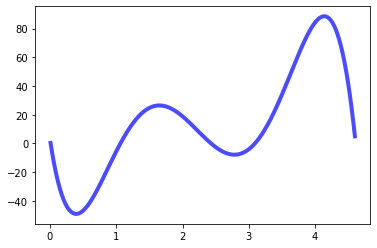

In [87]:
fig, ax = plt.subplots()
ax.plot(xx, yy, 'b-', lw=4, alpha=0.7, label='BSpline')

In [88]:
def plotCurve(P):
  pts = np.vstack([P, P[0]])
  x, y = pts.T
  i = np.arange(len(pts))

  interp_i = np.linspace(0, i.max(), 100000 * i.max())

  xi = interpolate.interp1d(i, x, kind='quadratic')(interp_i)  
  yi = interpolate.interp1d(i, y, kind='quadratic')(interp_i)

#   fig, ax = plt.subplots()
  fig,ax=plt.subplots()
  ax.plot(xi, yi)
  ax.plot(x, y, 'ko')
  #plt.show()
  return xi,yi

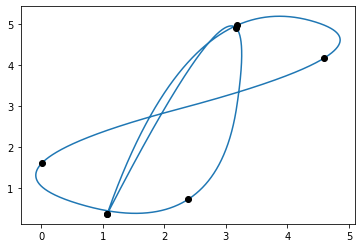

In [89]:
aa = plotCurve(a)

(1000,)
(1000,)


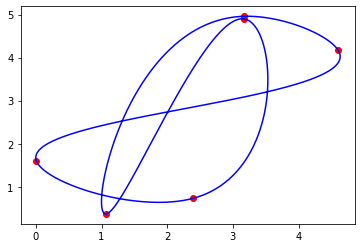

In [93]:


# append the starting x,y coordinates
x2 = np.r_[x, x[0]]
y2 = np.r_[y, y[0]]

# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x2, y2], s=0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

print(xi.shape)
print(yi.shape)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')

In [91]:
dot_xys = [[xi[i], yi[i]] for i in range(len(xi))]
print(len(dot_xys))

1000


In [94]:
i = 0
exp_screen = Screen()
for d in dot_xys:
    print(f"dot index {i}")
    # print(f"dot coordinates are {d}")
    # print(f"dot number {i}")
    for frameN in range(10):   # For exactly 200 frames
        # print(frameN)
        dot_stim = visual.Circle(win=exp_screen.window, units='deg', radius=0.2, fillColor=[-1, -1, -1], 
                                lineColor=[-1, -1, -1], edges = 128, lineWidth = 5, pos = d) 

        dot_stim.draw()

        exp_screen.window.flip()

    i = i+1

# pick two random dots from the set of dots and display them on the screen
rand_probs = np.random.choice(len(dot_xys), size = 2, replace = False)
prob_xys   = [dot_xys[i] for i in rand_probs]

circle1 = visual.Circle(win=exp_screen.window, units='deg', radius=0.2, fillColor=[-1, -1, -1], 
                                lineColor=[-1, -1, -1], edges = 128, lineWidth = 5, pos = prob_xys[0]) 
circle1.pos = prob_xys[0]

x_center = (prob_xys[0][0] + prob_xys[1][0])/2
y_center = (prob_xys[0][1] + prob_xys[1][1])/2


length = np.sqrt((prob_xys[0][0] - prob_xys[1][0])**2 + (prob_xys[0][1] + prob_xys[1][1])**2)


# some shapes:
arrowVert = [(-0.4,0.05),(-0.4,-0.05),(-.2,-0.05),(-.2,-0.1),(0,0),(-.2,0.1),(-.2,0.05)]

arrow = ShapeStim(exp_screen.window, vertices=arrowVert, fillColor='white', size=.5, lineColor='white', ori = 90)
arrow.pos = [prob_xys[0][0], prob_xys[0][1]+0.2]
# arrowVert = [(0, 0), (1, 0), (1, 0.5), (1.5, 0), (1, -0.5), (1, 0)]
# arrowVert = [(-length/2, 0), (length/2, 0), (length/2, 0.5), (length/4+length/2, 0), (length/2, -0.5), (length/2, 0)]
# arrowVert = [(prob_xys[0][0], prob_xys[0][1]), (prob_xys[1][0], prob_xys[1][1])]
line1Vert = [(prob_xys[1][0], prob_xys[1][1]), (prob_xys[1][0]-0.1, prob_xys[1][1]-0.1)]
line2Vert = [(prob_xys[1][0], prob_xys[1][1]), (prob_xys[1][0]+0.1, prob_xys[1][1]+0.1)]
# arrow = ShapeStim(exp_screen.window, vertices=arrowVert, closeShape=False, lineWidth=4, pos=(0,0), ori=0, units = "deg", fillColor = [-1, -1, -1], lineColor = [-1, -1, -1])
# line1 = ShapeStim(exp_screen.window, vertices=line1Vert, closeShape=False, lineWidth=4, pos=(0,0), ori=0, units = "deg", fillColor = [-1, -1, -1], lineColor = [-1, -1, -1])
# line2 = ShapeStim(exp_screen.window, vertices=line2Vert, closeShape=False, lineWidth=4, pos=(0,0), ori=0, units = "deg", fillColor = [-1, -1, -1], lineColor = [-1, -1, -1])
# arrow.pos = [x_center, y_center]
# dot_prob1 = visual.ElementArrayStim(
#                                                     win=exp_screen.window,
#                                                     units="deg",
#                                                     nElements=1,
#                                                     elementTex=None,
#                                                     elementMask="circle",
#                                                     xys=[prob_xys[1]],
#                                                     sizes=0.5
#                                                 )

circle2 = visual.Circle(win=exp_screen.window, units='deg', radius=0.2, fillColor=[-1, -1, -1], 
                                lineColor=[-1, -1, -1], edges = 128, lineWidth = 5, pos = prob_xys[1]) 
circle2.pos = prob_xys[1]

# stim1 = visual.TextStim(win=exp_screen.window, text='1', pos=prob_xys[0], color=(-1,-1,-1), units='deg', height = 1.5)
# stim2 = visual.TextStim(win=exp_screen.window, text='2', pos=prob_xys[1], color=(-1,-1,-1), units='deg', height = 1.5)
# stim3 = visual.TextStim(win=exp_screen.window, text='x', pos=[x_center, y_center], color=(-1,-1,-1), units='deg', height = 1.5)

# stim1.draw()
# stim2.draw()
# stim3.draw()
circle1.draw()
circle2.draw()
arrow.draw()

exp_screen.window.flip()

event.waitKeys()

exp_screen.window.close()

dot index 0
dot index 1
dot index 2
dot index 3
dot index 4
dot index 5
dot index 6
dot index 7
dot index 8
dot index 9
dot index 10
dot index 11
dot index 12
dot index 13
dot index 14
dot index 15
dot index 16
dot index 17
dot index 18
dot index 19
dot index 20
dot index 21
dot index 22
dot index 23
dot index 24
dot index 25
dot index 26
dot index 27
dot index 28
dot index 29
dot index 30
dot index 31
dot index 32
dot index 33
dot index 34
dot index 35
dot index 36
dot index 37
dot index 38
dot index 39
dot index 40
dot index 41
dot index 42
dot index 43
dot index 44
dot index 45
dot index 46
dot index 47
dot index 48
dot index 49
dot index 50
dot index 51
dot index 52
dot index 53
dot index 54
dot index 55
dot index 56
dot index 57
dot index 58
dot index 59
dot index 60
dot index 61
dot index 62
dot index 63
dot index 64
dot index 65
dot index 66
dot index 67
dot index 68
dot index 69
dot index 70
dot index 71
dot index 72
dot index 73
dot index 74
dot index 75
dot index 76
dot index

In [100]:
# pick two random dots from the set of dots and display them on the screen
rand_probs = np.random.choice(len(dot_xys), size = 2, replace = False)
rand_probs

array([785, 846])

# Problem: The speed of dot when moving on the B-spline is different
The distance between dots in the B-spline are different in different parts of the curve.
## How to solve it?
1. fit the B-spline and then restrict the dots to have a certain distance between them

In [14]:
x = np.random.uniform(0, 5, 6)
y = np.random.uniform(x + 0.5, 5, 6)
x1 = np.sort(x)
y1 = np.sort(y)
a = [(x[i], y[i]) for i in range(len(x))]
# print(x)
# print(y)

t, c, k = interpolate.splrep(x1, y1, s=0, k=5)
N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
yy = spline(xx)

dot_xys = [[xx[i], yy[i]] for i in range(len(xx))]

print(x)
print(y)

print(y - x)

[1.14311666 2.31553496 1.11342469 3.57716442 3.77824047 0.72388257]
[3.41608358 3.03191713 2.70965686 4.48487394 4.29163522 4.42141009]
[2.27296692 0.71638217 1.59623217 0.90770953 0.51339474 3.69752752]


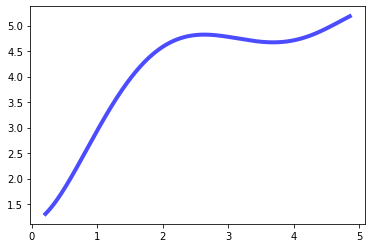

In [11]:
fig, ax = plt.subplots()
ax.plot(xx, yy, 'b-', lw=4, alpha=0.7, label='BSpline')

In [60]:
# append the starting x,y coordinates
x = np.r_[x, x[0]]
y = np.r_[y, y[0]]

# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x, y], s=0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

print(xi.shape)
print(yi.shape)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')

TypeError: 'float' object is not subscriptable